In [1]:
%load_ext autoreload
%autoreload 2

## Esercizio: Meteora

Una meteora di forma sferica è in caduta verticale verso la Terra ed ha appena raggiunto la mesosfera. La meteora è soggetta alla forza di gravità, data da (si assume che un asse cartesiano orientato verso l’alto):

$$
F_g = - m g
$$

Dove $m$ è la massa e $g$ è l’accelerazione di gravità nella mesosfera. Al moto si oppone la forza di trascinamento dovuta all’attrito con l’aria e data da:

$$
F_t = -\frac{1}{2} \rho_a C_d S v |v|
$$

Dove $\rho_a$ è la densità dell'aria, $C_d$ è il coefficiente di attrito, $v$ è la velocità di caduta. Per semplicità si assume che $g$ e $\rho_a$ siano costanti. La massa della meteora è invece una quantità variabile, perché (per via della frizione con l’atmosfera) il suo raggio decresce ad un ritmo proporzionale alla velocità ed al raggio stesso:

$$
\dot{r} = -b_r |v| r
$$

La massa può quindi essere calcolata come:

$$
m = \rho_m \frac{4}{3} \pi r^3
$$

Dove $\rho_m$ è la densità della meteora.
La superficie della sezione $S$ è anch'essa variabile e data da:

$$
S = \pi r^2
$$

Nel complesso, abbiamo che la meteora è descritta da un'equazione differenziale ordinaria nella forma:

$$\begin{align}
\dot{x} &= v \\
\dot{v} &= \frac{1}{m} (F_g + F_t) \\
\dot{r} &= b_r |v| r
\end{align}$$

Dove le componenti dello stato sono la posizione $x$, la velocità $v$ ed il raggio $r$. I termini $m$, $F_g$ ed $F_t$ sono calcolabili come indicato sopra.

## Esercizio 1

**Nel modulo `sol.meteor` definire la funzione**

```python
def dstate(X, t):
    # Parametri fissi
    rhoA = 0.0020 # Densita' aria
    rhoM = 3.32e3 # Densita' meteorite
    Cd = 0.47 # Coefficiente di trascinamento
    g = 9.7 # Accelerazione di gravita' nella mesosfera
    br = 0.71e-5 # Tasso di riduzione del raggio
    ...
```

* La funzione deve calcolare le espressioni che definiscono l'ODE
* Diversi parametri (come indicato) saranno considerati fissi nell'esercizio
* La funzione deve restituire un array `numpy` con le due componenti della derivata


**Nel modulo `sol.meteor` si definisca quindi la funzione:**

```python
def simulate():
    v0 = -18e3
    d0 = 51413
    r0 = 0.11
    X0 = [d0, v0, r0]
    t = np.linspace(0, 10, 10 * 10000)
    ...
```

* La funzione deve risolvere un problema ai valori iniziali
* ...Con lo stato iniziale ed il vettore dei tempi indicati
* Il metodo deve restituire
  - La matrice con gli stati visitati
  - Il vettore dei tempi visitati

Si collaudi la funzione nella cella seguente. Per verificare la correttezza dei risultati, può essere utile disegnare l'andamento dello stato usando la funzione `plot_state_evolution` nel modulo `base.util` incluso nel tema d'esame.

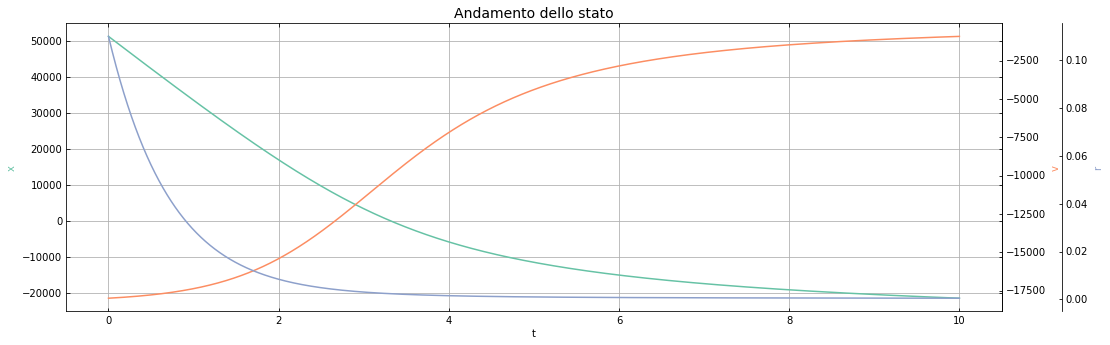

In [24]:
from sol import meteor
from base import util

X, t = meteor.simulate(r0=0.11)
util.plot_state_evolution(X, t, xlabel='t', ylabels=['x', 'v', 'r'], figsize=(20, 5), title='Andamento dello stato')

## Esercizio 2

**Se si assume che il raggio della meteora sia costante, la velocità terminale viene raggiunta quando:**

$$
f(v) = F_g(v) + F_t(v) = 0
$$

**Nel modulo `sol.meteor` si definisca la funzione:**

```python
def find_terminal_speed_aux(v):
    # Parametri fissi
    rhoA = 0.0020 # Densita' aria
    rhoM = 3.32e3 # Densita' meteorite
    Cd = 0.47 # Coefficiente di trascinamento
    g = 9.7 # Accelerazione di gravita' nella mesosfera
    br = 0.71e-5 # Tasso di riduzione del raggio
    r = 1e-6 # Raggio della meteora (fisso)
    ...
```

* La funzione deve calcolare e restituire il valore di $F_g(v) + F_t(v)$ in funzione di $v$


**Nel modulo `sol.meteor` si definisca la funzione:**

```python
def find_terminal_speed():
    a, b = -1000, 1
    ...
```

* La funzione deve calcolare il valore della velocità terminale risolvendo l'equazione sopra indicata
* Per la soluzione, si utilizzi il metodo `scipy.optimize.brentq` con gli estremi dell'intervallo indicati
* La funzione deve restituire il valore della velocità calcolato

In [25]:
vsol = meteor.find_terminal_speed()
print(f'Velocità terminale: {vsol} m/s')

Velocità terminale: -9.55818315623973 m/s


## Esercizio 3

**Sia $r(t)$ il valore del raggio (variabile) al tempo $t$. Dato un valore di raggio $r^*$ di interesse, è possibile determinare per quale valore di tempo venga raggiunto risolvendo:**

$$
F(t) = r(t) - r^* = 0
$$

Il valore di $t$ che azzera la funzione rappresenta la soluzione.

**Nel modulo `sol.meteor` si definisca la funzione**

```python
def find_vanishing_time_aux(t):
    ...
```

* La funzione deve calcolare il valore della funzione $F(t)$ indicata sopra, per $r^* = 10^{-3}$
* Si consideri come riferimento il problema ai valori iniziale risolto nell'esercizio 1

**Nel modulo `sol.meteor` si definisca la funzione**

```python
def find_vanishing_time():
    a, b = 0, 60 * 60
    ...
```

* La funzione deve determinare per quale tempo la funzione $F(t)$ si azzera
* Per la soluzione dell'equazione, si utilizzi il metodo `scipy.optimize.brentq` con gli estremi indicati
* La funzione deve restituire il valore del tempo che risolve l'equazione

In [30]:
tsol = meteor.find_vanishing_time()
print(f'Tempo per cui la meteora ha 1mm di raggio: {tsol} s')

Tempo per cui la meteora ha 1mm di raggio: 4.9753649188400555 s
